# Lab 08 - wykrywanie początków dźwięku (Onset)

Karol Działowski

Wyznacz onsety poszczególnych dźwięków dla wszystkich plików źródłowych. Skorzystaj z
metody polegającej na wyznaczeniu obwiedni sygnału w dziedzinie czasu opierając się na
uśrednionej energii sygnału dla zadanej liczby próbek (parametr zadania). Wyznacz obwiednie dla
różnych wartości parametru. Zbadaj przydatność obwiedni do wyznaczania onsetów dla różnych
wartości parametru (np. 3 różne wartości).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io import wavfile
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

## Rhythm_1.wav

In [4]:
y, sr = librosa.load("./data/Rhythm_1.wav", mono=True)

In [21]:
sr

22050

In [5]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [52]:
n_samples_0 = 1000
n_samples_1 = int(n_samples_0 + 0.2*n_samples_0)
n_samples_2 = int(n_samples_0 - 0.2*n_samples_0)
envelope_0 = moving_average(y**2, n_samples_0)
envelope_1 = moving_average(y**2, n_samples_1)
envelope_2 = moving_average(y**2, n_samples_2)

In [89]:
from scipy.signal import find_peaks

peaks_0, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_0)*2)
peaks_1, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_1)*2)
peaks_2, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_2)*2)

Text(0.5, 1.0, '800')

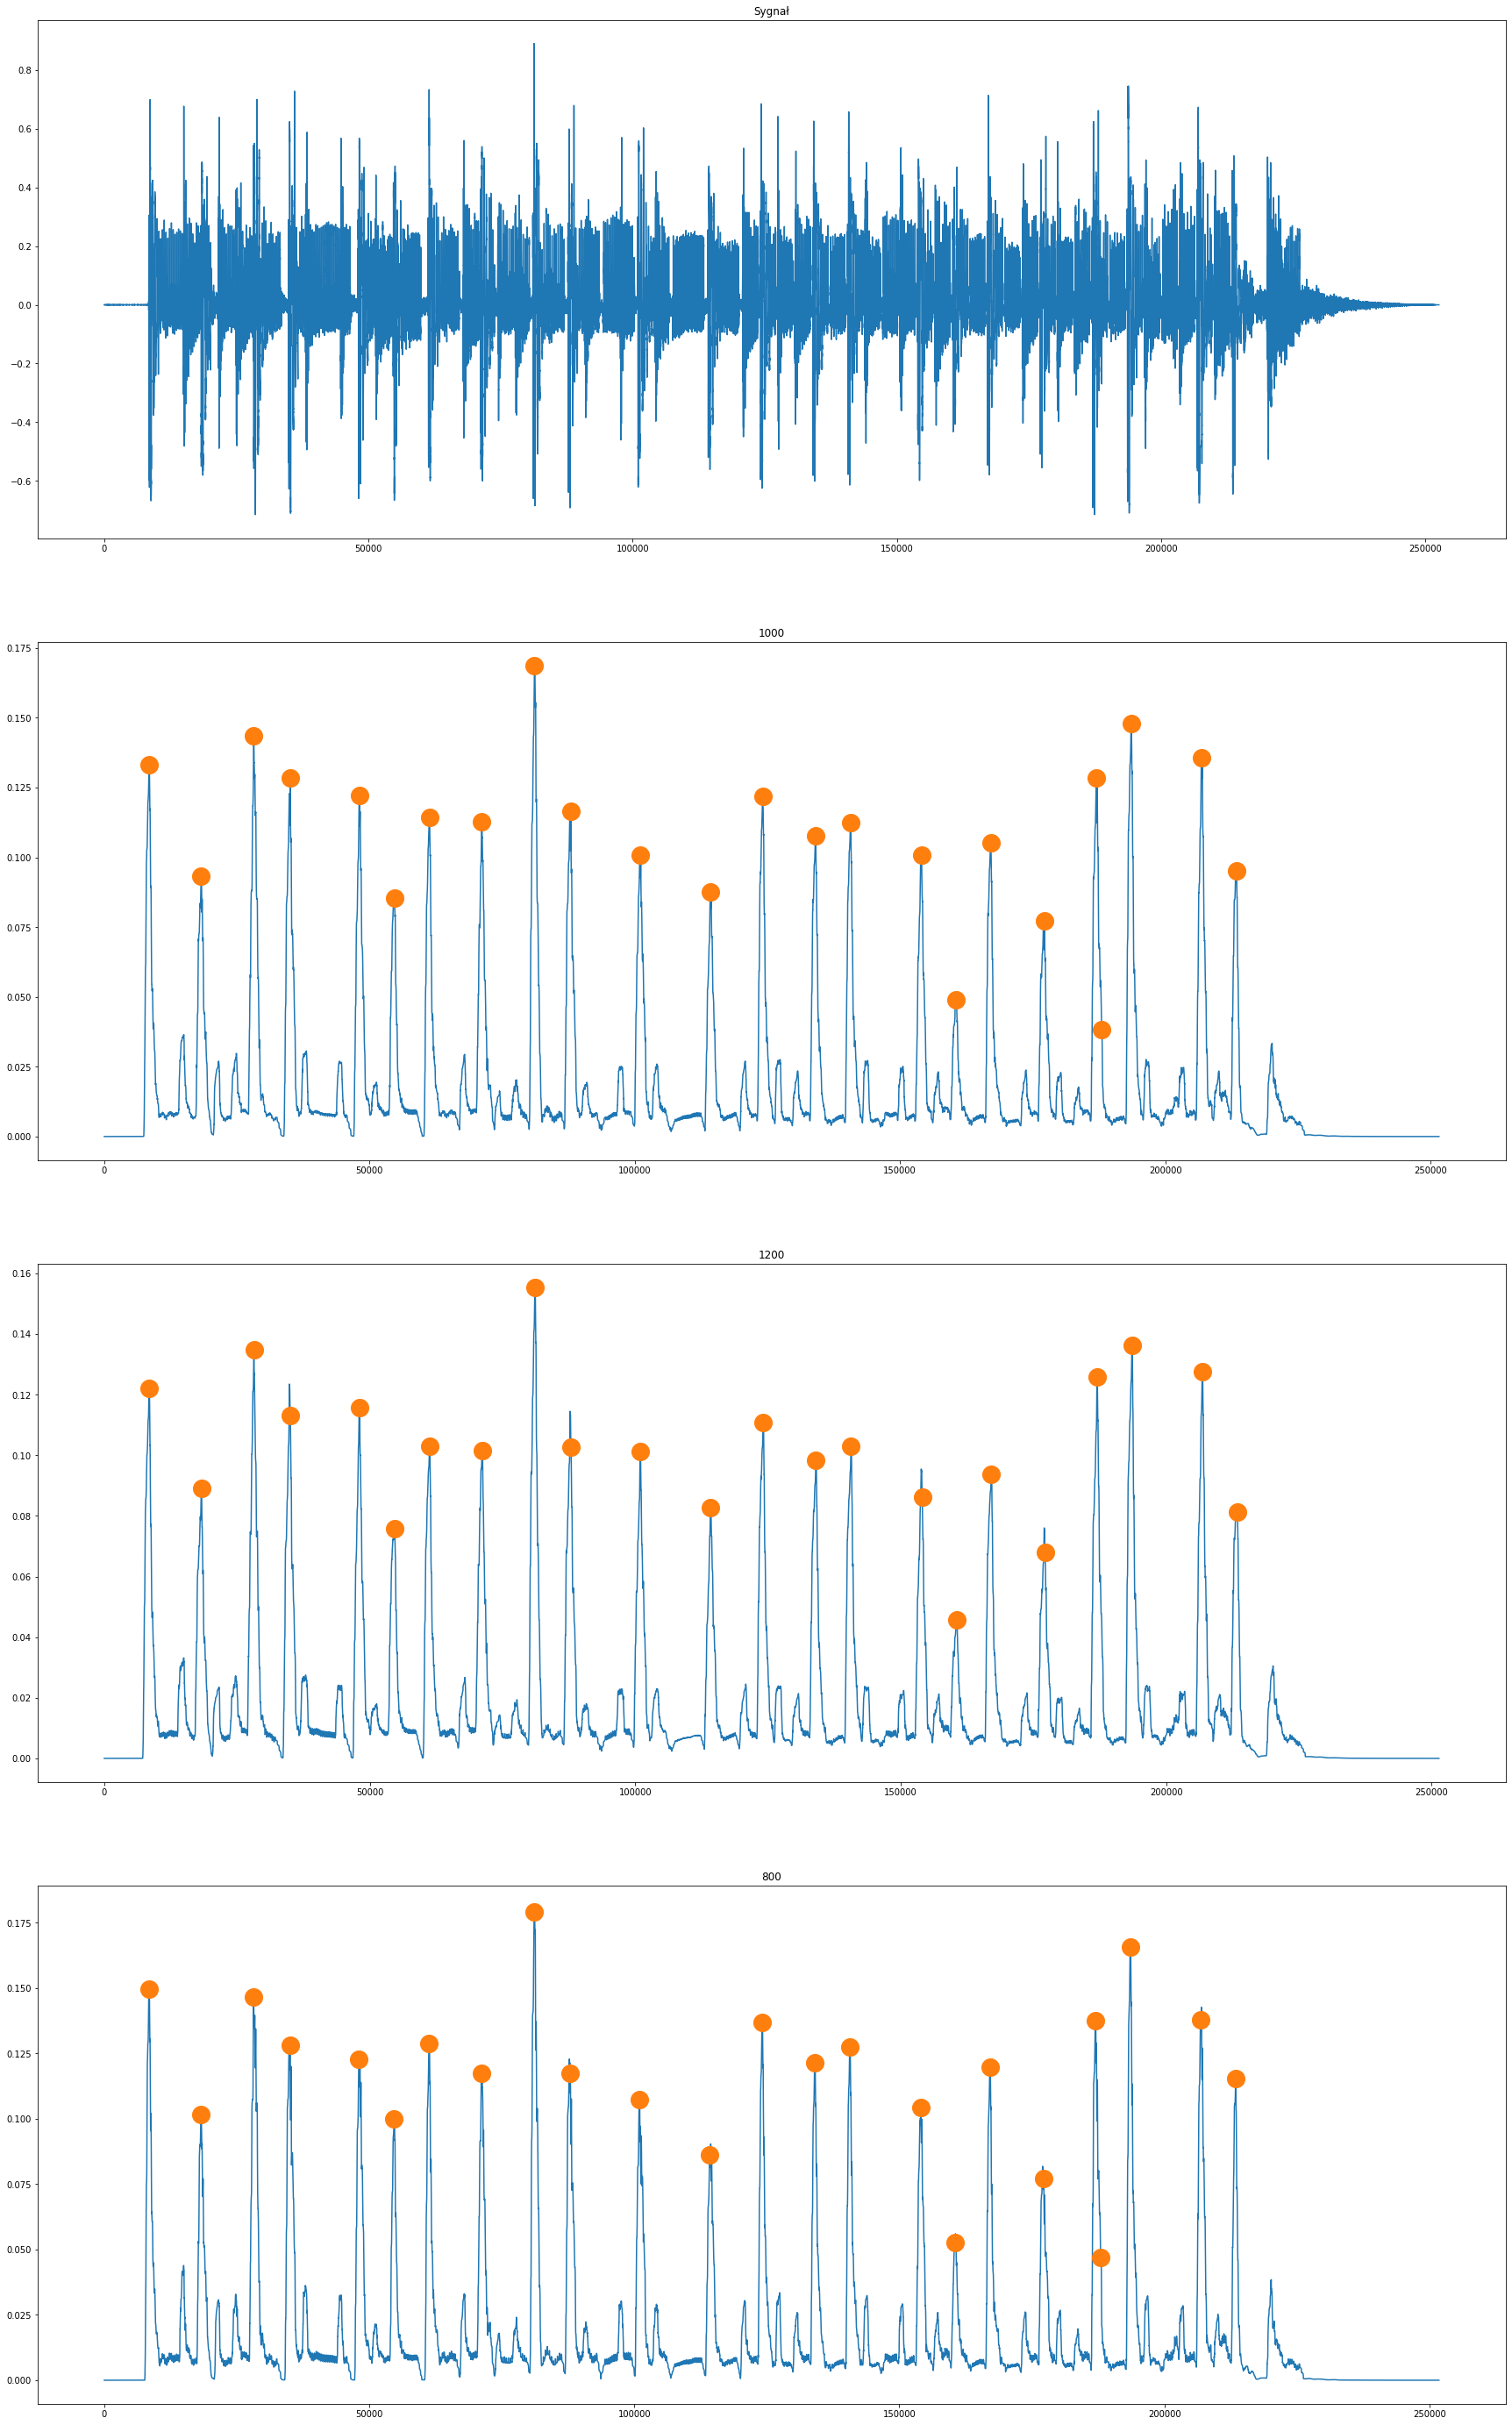

In [93]:
fig, axes = plt.subplots(4, 1, figsize=(30, 50))
axes[0].plot(y)
axes[0].set_title("Sygnał")
axes[1].plot(envelope_0)
axes[1].plot(peaks_0, envelope_0[peaks_0], "o", markersize=20)
axes[1].set_title(n_samples_0)
axes[2].plot(envelope_1)
axes[2].plot(peaks_1, envelope_1[peaks_1], "o", markersize=20)
axes[2].set_title(n_samples_1)
axes[3].plot(envelope_2)
axes[3].plot(peaks_2, envelope_2[peaks_2], "o", markersize=20)
axes[3].set_title(n_samples_2)

## Rhythm_2 

In [50]:
y, sr = librosa.load("./data/Rhythm_2.wav", mono=True)

Text(0.5, 1.0, '800')

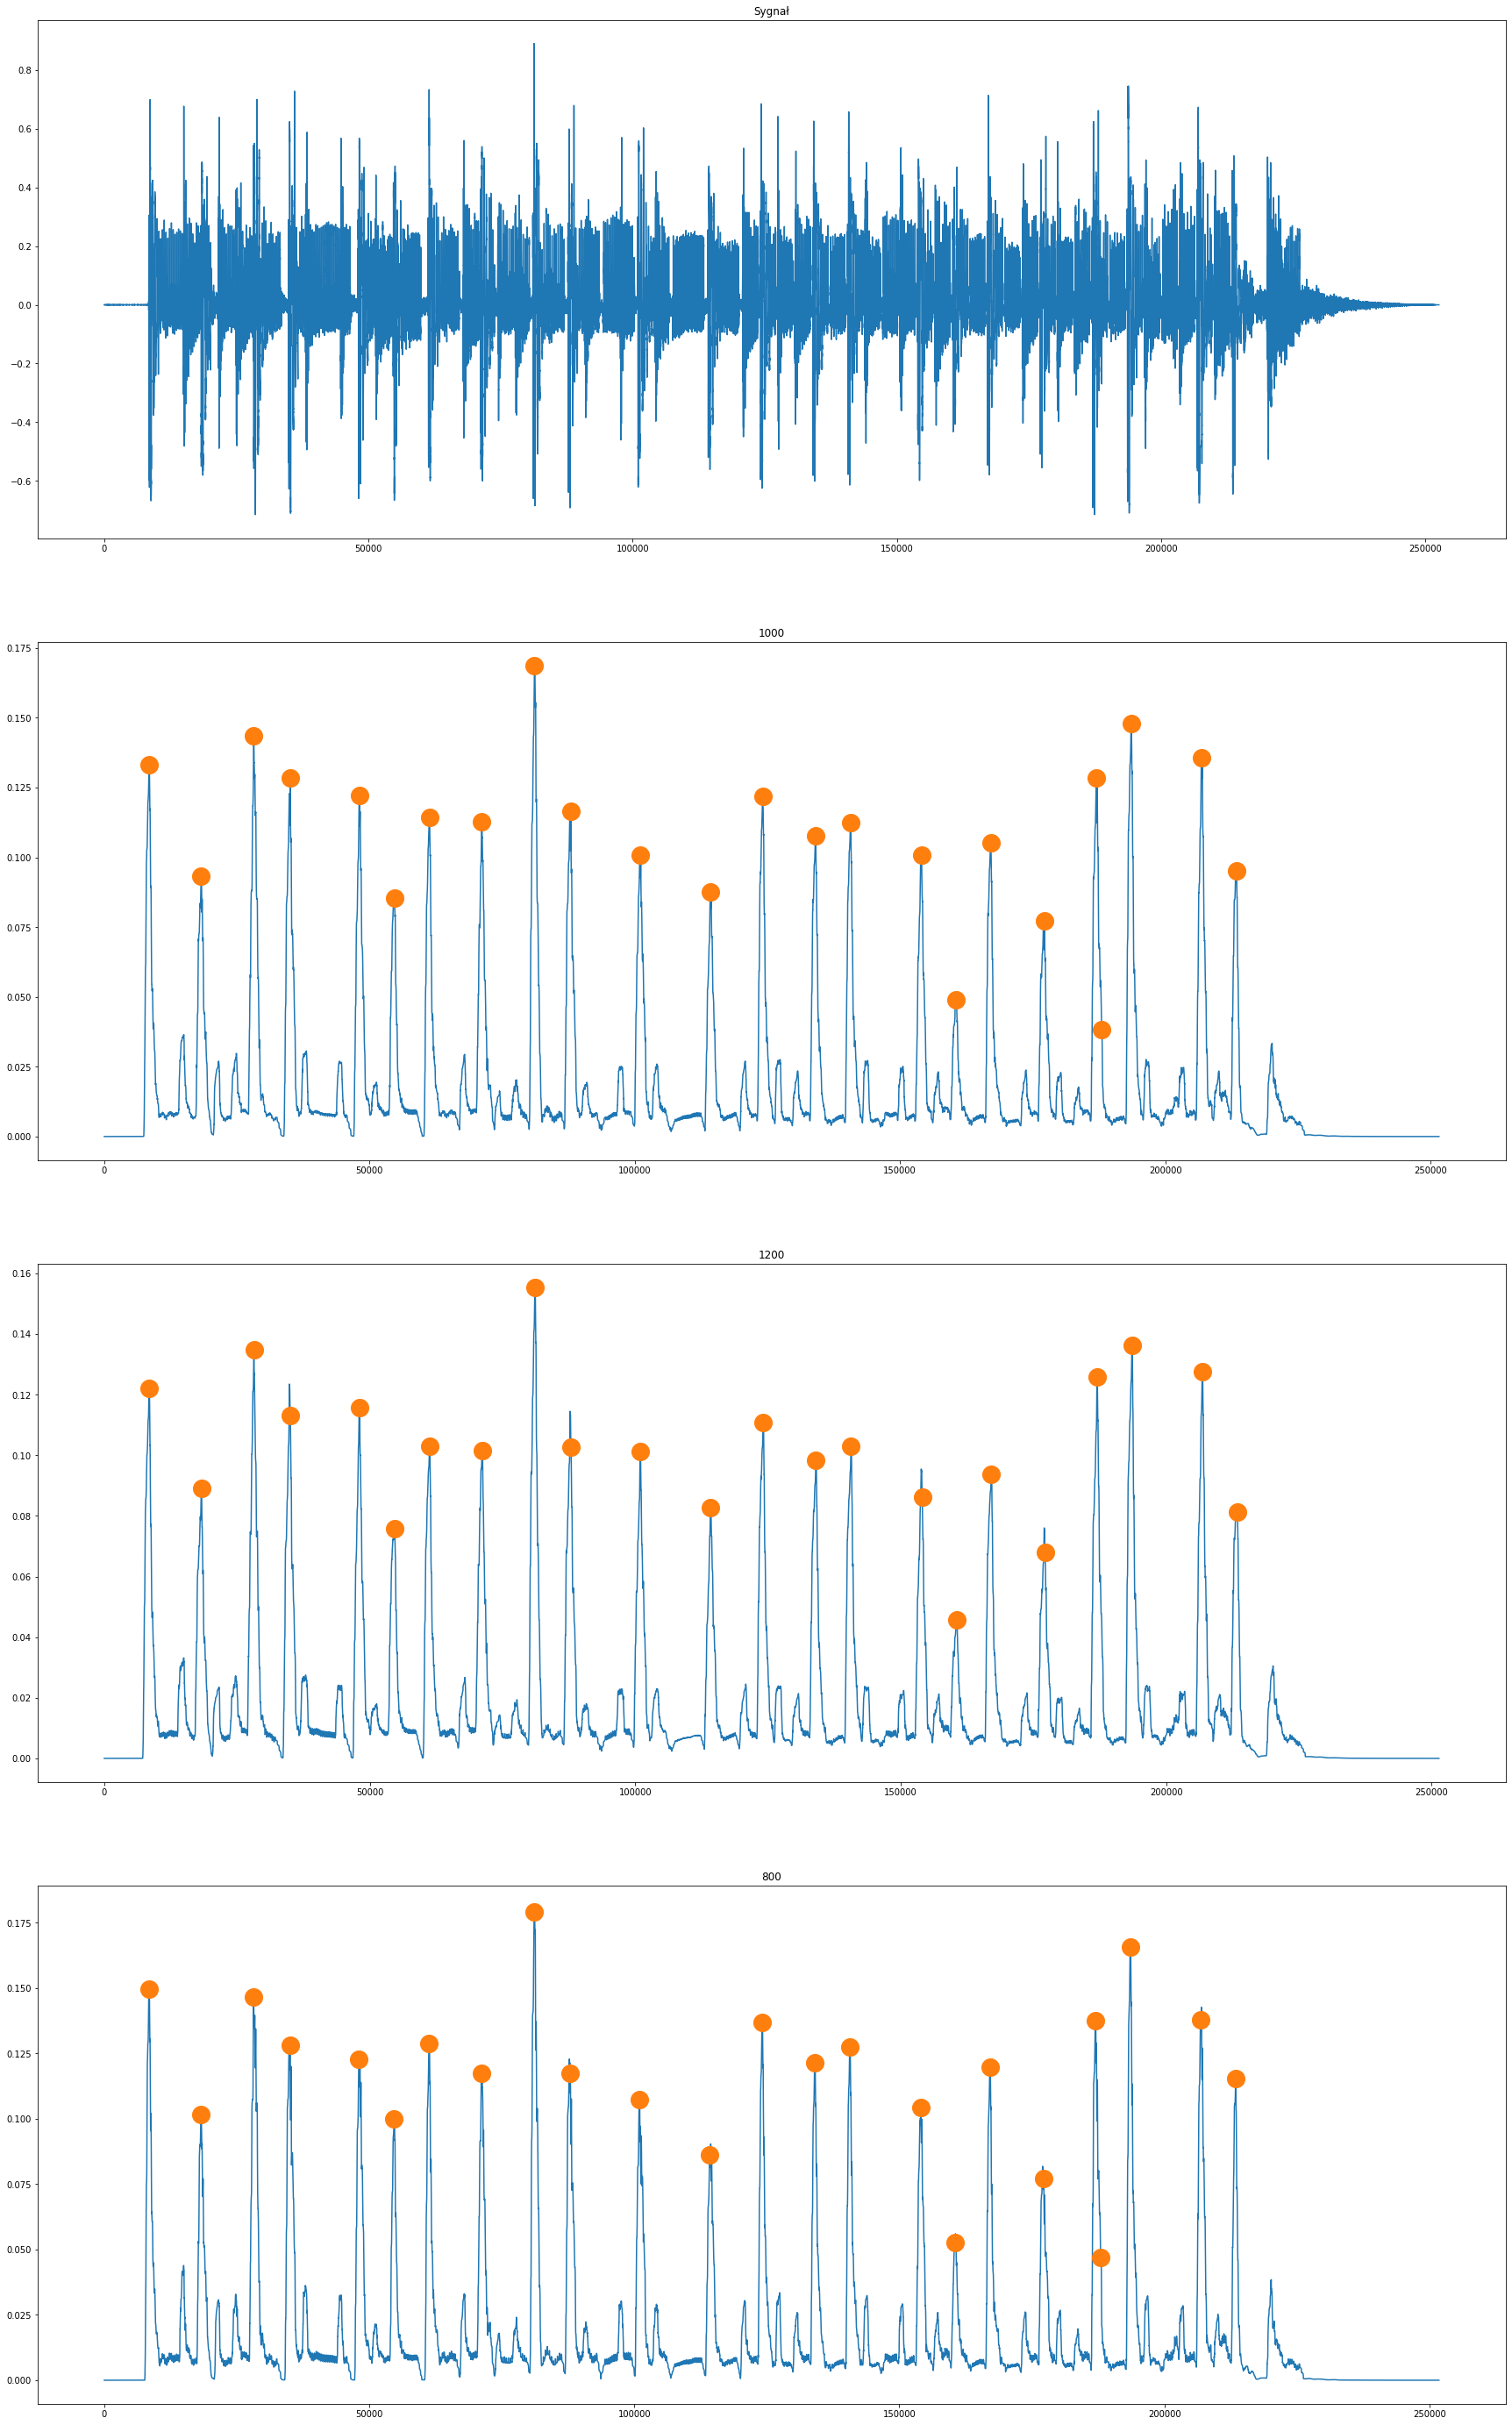

In [94]:
n_samples_0 = 1000
n_samples_1 = int(n_samples_0 + 0.2*n_samples_0)
n_samples_2 = int(n_samples_0 - 0.2*n_samples_0)
envelope_0 = moving_average(y**2, n_samples_0)
envelope_1 = moving_average(y**2, n_samples_1)
envelope_2 = moving_average(y**2, n_samples_2)


peaks_0, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_0)*2)
peaks_1, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_1)*2)
peaks_2, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_2)*2)

fig, axes = plt.subplots(4, 1, figsize=(30, 50))
axes[0].plot(y)
axes[0].set_title("Sygnał")
axes[1].plot(envelope_0)
axes[1].plot(peaks_0, envelope_0[peaks_0], "o", markersize=20)
axes[1].set_title(n_samples_0)
axes[2].plot(envelope_1)
axes[2].plot(peaks_1, envelope_1[peaks_1], "o", markersize=20)
axes[2].set_title(n_samples_1)
axes[3].plot(envelope_2)
axes[3].plot(peaks_2, envelope_2[peaks_2], "o", markersize=20)
axes[3].set_title(n_samples_2)

### Rhythm 3

In [58]:
y, sr = librosa.load("./data/Rhythm_3.wav", mono=True)

Text(0.5, 1.0, '800')

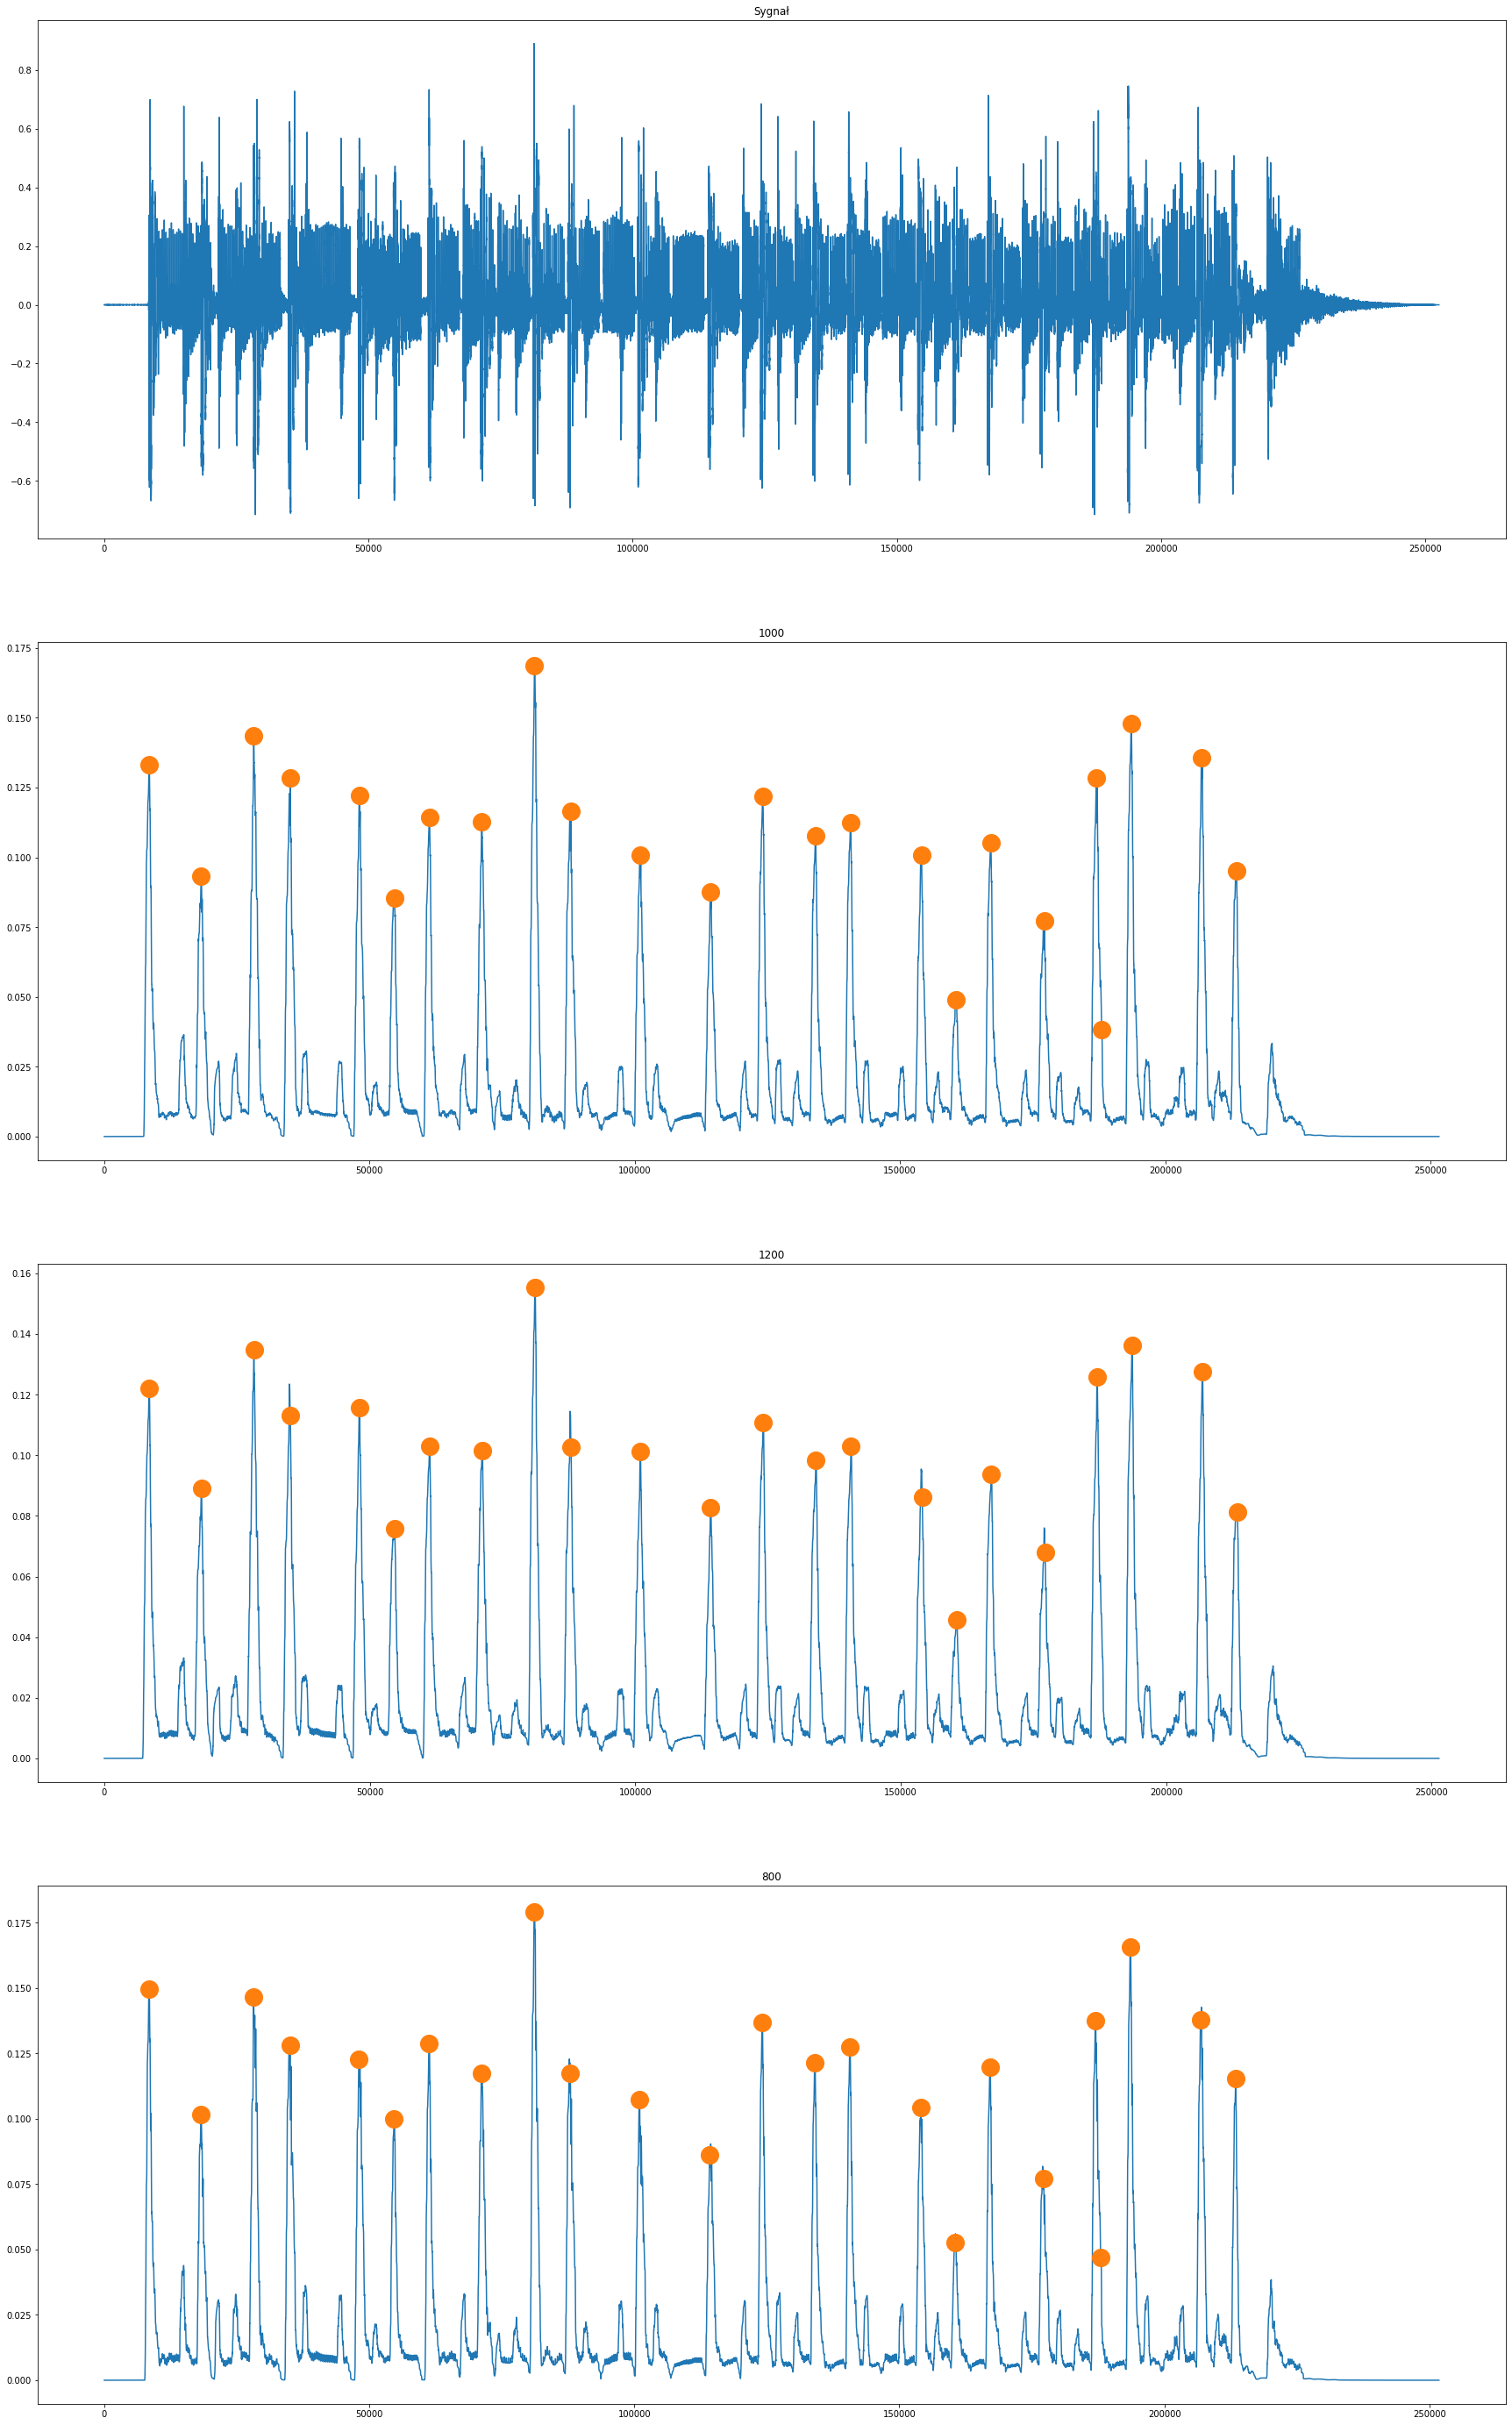

In [95]:
n_samples_0 = 1000
n_samples_1 = int(n_samples_0 + 0.2*n_samples_0)
n_samples_2 = int(n_samples_0 - 0.2*n_samples_0)
envelope_0 = moving_average(y**2, n_samples_0)
envelope_1 = moving_average(y**2, n_samples_1)
envelope_2 = moving_average(y**2, n_samples_2)


peaks_0, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_0)*2)
peaks_1, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_1)*2)
peaks_2, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_2)*2)

fig, axes = plt.subplots(4, 1, figsize=(30, 50))
axes[0].plot(y)
axes[0].set_title("Sygnał")
axes[1].plot(envelope_0)
axes[1].plot(peaks_0, envelope_0[peaks_0], "o", markersize=20)
axes[1].set_title(n_samples_0)
axes[2].plot(envelope_1)
axes[2].plot(peaks_1, envelope_1[peaks_1], "o", markersize=20)
axes[2].set_title(n_samples_1)
axes[3].plot(envelope_2)
axes[3].plot(peaks_2, envelope_2[peaks_2], "o", markersize=20)
axes[3].set_title(n_samples_2)